Muhammad Irfan Hilman

FTDS Batch 16

# I. PERKENALAN


Problem Statement:

1. Melakukan exploratory data analysis (EDA) terhadap dataset perjalanan ride-hailing (bisa diunduh disini https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

2. Membuat model prediksi harga perjalanan ride-hailing menggunakan metodel Linear Regression

3. Melakukan evaluasi performance model dan menarik kesimpulan

Pengerjaan akan menggunakan Google Colab

# II. IMPORT LIBRARY

Melakukan import library yang akan digunakan pada projek ini

In [71]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# III. DATA LOADING

Establish connection antara Google Colab dan Kaggle

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download brllrb/uber-and-lyft-dataset-boston-ma

 56% 25.0M/44.5M [00:00<00:00, 129MB/s]
100% 44.5M/44.5M [00:00<00:00, 166MB/s]


In [7]:
! unzip uber-and-lyft-dataset-boston-ma

Archive:  uber-and-lyft-dataset-boston-ma.zip
  inflating: rideshare_kaggle.csv    


In [8]:
# Loading dataset rideshare_kaggle.csv dan store ke dalam df
df = pd.read_csv('/content/rideshare_kaggle.csv')

# Tampilkan seluruh kolom dan 3 baris pertama
pd.options.display.max_columns = None
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
# Tampilkan nama kolom dan dtype
df.info()
print('Jumlah baris adalah {} dan jumlah kolom adalah {}'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terdapat 56 jumlah kolom. Jumlah ini terlalu banyak dan jika digunakan semua berisiko menimbulkan overfitting model. Oleh karena itu pada bagian preprocessing data jumlah kolom2 ini akan dikurangi. Sebelum itu kita akan lakukan EDA terhadap dataset.

# IV. EXPLORATORY DATA ANALYSIS (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Pertama, visualisasi data yang berhubungan dengan waktu

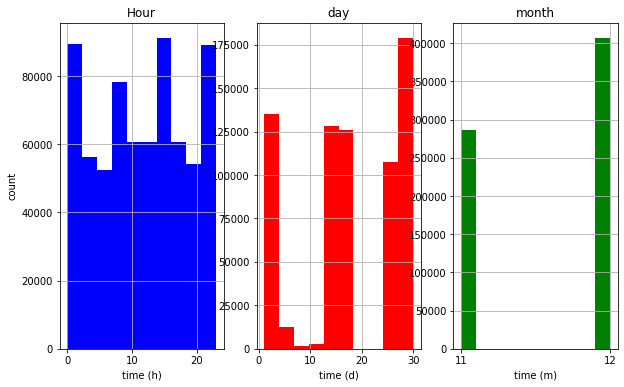

In [10]:
#Buat subplot dengan 3 kolom dan 1 baris
fig, ax = plt.subplots(1, 3, figsize=(10, 6))	

#Plot histogram hour
df['hour'].hist(ax=ax[0], color='blue') 		
ax[0].set_title('Hour')
ax[0].set_xlabel('time (h)')
ax[0].set_ylabel('count')

#Plot histogram day
df['day'].hist(ax=ax[1], color='red') 		 	
ax[1].set_title('day')
ax[1].set_xlabel('time (d)')

#Plot histogram month
df['month'].hist(ax=ax[2], color='green') 		 
ax[2].set_title('month')
ax[2].set_xlabel('time (m)')
ax[2].set_xticks([11,12])


Terlihat jika data diambil secara teratur selama 24 jam. Tetapi data hanya terpusat pada awal, pertengahan dan akhir bulan. Data juga diambil hanya pada bulan November dan Desember. 

Berikutnya kita akan tampilkan jenis taxi (cab) menggunakan pie chart

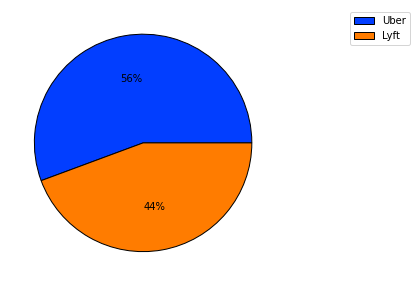

In [11]:
# Definisikan warna palet utk pie chart
palette_color = sns.color_palette('bright')
label = list(pd.DataFrame(df['cab_type'].value_counts()).index)

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(df['cab_type'].value_counts(), colors=palette_color, autopct='%.0f%%', wedgeprops={'edgecolor':'k'})
plt.legend(label, loc='upper right', bbox_to_anchor=(1.5,1))
plt.show()


Hanya ada 2 jenis taksi: Lyft dan Uber. Proporsi data utk Uber adalah 56% dan Lyft adalah 44%.

Kita akan lihat harga masing2 service pada taxi Lyft dan Uber

In [12]:
# Kelompokkan berdasarkan jenis taksi, nama layanan dan rerata harganya
df.groupby(by=["cab_type","name"]).agg({'price':'mean'})

price
cab_type name                   
Lyft     Lux           17.771240
         Lux Black     23.062468
         Lux Black XL  32.324086
         Lyft           9.610885
         Lyft XL       15.309363
         Shared         6.029893
Uber     Black         20.523786
         Black SUV     30.286763
         Taxi                NaN
         UberPool       8.752500
         UberX          9.765074
         UberXL        15.678144
         WAV            9.765019

Layanan Lux Black XL merupakan layanan termahal pada Lyft dengan rerata 32.3 USD. Sedangkan Black SUV merupakan layanan termahal pada Uber dengan rerata 30 USD. Layanan termurah dalah Shared pada Uber dengan hanya 6 USD.

Berikutnya kita akan lakukan grouping data harga ride-hailing berdasarkan lokasi

In [13]:
# Kelompokkan data berdasarkan destinasi, sumber dan rerata harganya
df.groupby(by=["destination","source"]).agg({'price':'mean'})

price
destination source                            
Back Bay    Boston University        13.992801
            Fenway                   13.802155
            Haymarket Square         16.860489
            North End                19.550935
            Northeastern University  13.698923
...                                        ...
West End    Fenway                   18.161806
            Haymarket Square         12.529855
            North End                13.494873
            Northeastern University  18.204155
            South Station            15.881172

[72 rows x 1 columns]

Kita akan tentukan harga min dan max dari data diatas.

In [14]:
# Cari harga max pada grouping destinasi dan sumber
df.groupby(by=["destination","source"]).agg({'price':'mean'}).max()

price    25.498434
dtype: float64

Harga max adalah 25.49 USD

In [15]:
# Cari harga min pada grouping destinasi dan sumber
df.groupby(by=["destination","source"]).agg({'price':'mean'}).min()

price    12.332545
dtype: float64

Harga min adalah 12.3 USD

Berikutnya kelompokkan hagra ride-hailing rata2 terhadap jenis cuaca utk melihat apakah terdapat korelasi.

In [16]:
# Kelompokkan data berdasarkan cuaca dan harga rerata
df.rename(columns={'short_summary':'weather'}, inplace=True)
df.groupby("weather").agg({'price':'mean'})

,price
weather,
Clear,16.486460
Drizzle,16.501784
Foggy,16.540883
Light Rain,16.561282
Mostly Cloudy,16.594419
Overcast,16.535116
Partly Cloudy,16.552009
Possible Drizzle,16.481390
Rain,16.539987


Harga rerata hampir sama pada semua kondisi cuaca. Hal ini mengindikasikan cuaca tidak berpengaruh pada harga. Tapi sebelum memutuskan untuk menghapus kolom, lebih baik menganalisa korelasinya menggunakan heatmap.

# V. DATA PREPROCESSING

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Pertama, kita akan hapus missing values dari dataset

In [17]:
# Delete missing values
df.dropna(inplace=True)

Lalu kita hitung nilai unik masing2 kolom

In [18]:
# Check value kolom timezone
df.nunique()

id                             637976
timestamp                       35796
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         12
name                               12
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
weather                             9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Berikutnya delete kolom2 yang tidak dibutuhkan. Kolom id tidak dibutuhkan untuk memprediksi harga. Kolom timestamp dan datetime juga sudah diwakili oleh kolom hour, day dan month. Kolom latitude dan longitude tidak diperlukan karena hanya menandakan wilayah di dalam peta. Kolom long_summary tidak dibutuhkan karena hanya penjabaran string dari kolom short_summary. Kolom icon juga tidak diperlukan karena sudah ada kolom short_summary. 

In [19]:
# Delete kolom2 yang tidak dipakai dan store hasilnya dalam df
df = df.drop(['id', 'timestamp', 'datetime', 'timezone','product_id','latitude','longitude','long_summary','icon'], axis = 1)

Sekarang kita lihat lagi jumlah kolom pada df

In [20]:
# Tampilkan nama kolom dan dtype
df.info()
print('Jumlah baris adalah {} dan jumlah kolom adalah {}'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   source                       637976 non-null  object 
 4   destination                  637976 non-null  object 
 5   cab_type                     637976 non-null  object 
 6   name                         637976 non-null  object 
 7   price                        637976 non-null  float64
 8   distance                     637976 non-null  float64
 9   surge_multiplier             637976 non-null  float64
 10  temperature                  637976 non-null  float64
 11  apparentTemperature          637976 non-null  float64
 12  weather                      637976 non-null  object 
 13 

Pertama, kita ingin mengetaui korelasi antara kolom yang berhubungan dengan waktu dan price.

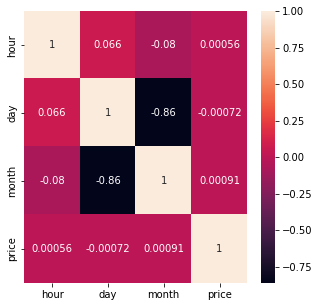

In [22]:
# Buat variabel time berisi nama kolom2 waktu
time = ['hour','day','month','price']

# Plot heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df[time].corr(), annot=True)

Terlihat jika month, day dan hour tidak memiliki korelasi yang signifikan dengan price, sehingga dapat di-drop

In [23]:
# Delete kolom hour, day dan month. Store variabel ke dalam df_2
df.drop(['hour','day','month'], axis = 1, inplace=True)

Next, kita akan mengetahui apakah ada korelasi antara kolom temperatur dengan price

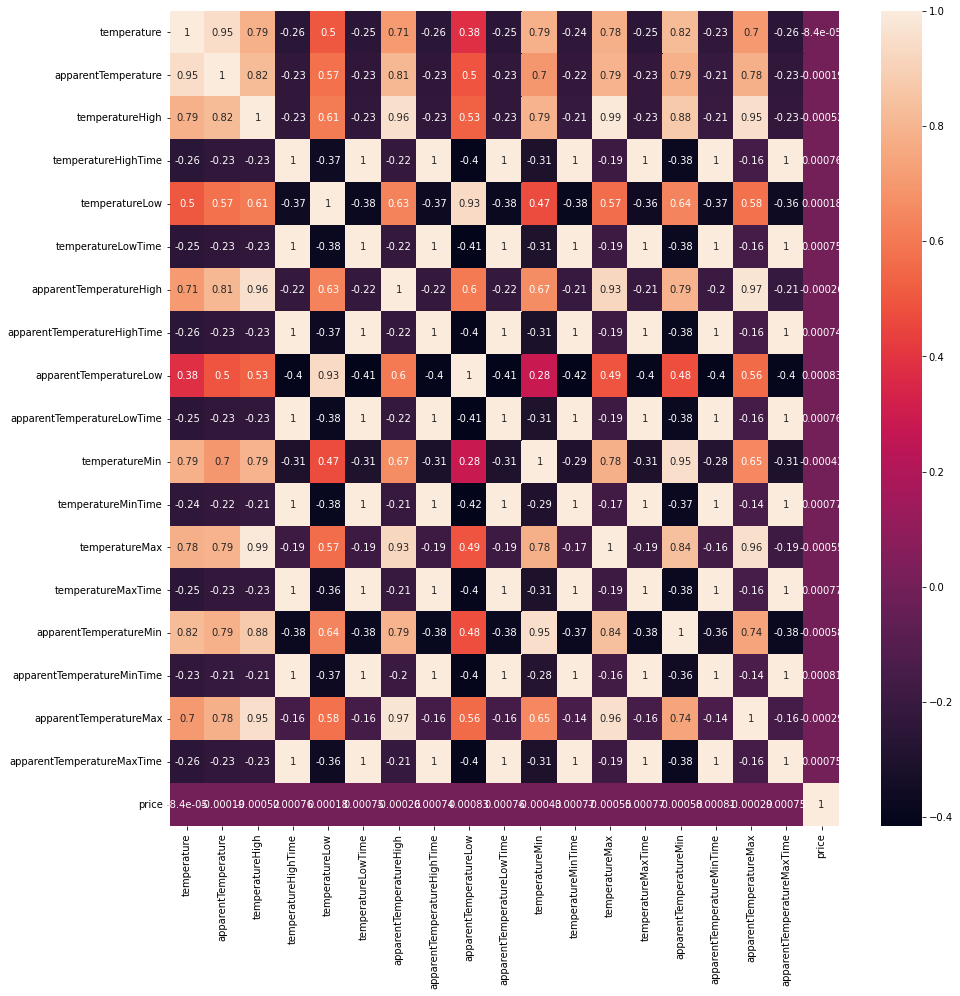

In [24]:
# Buat variabel temp berisi nama kolom2 temperatur
temp = ['temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
        'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
        'temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime',
        'apparentTemperatureMax','apparentTemperatureMaxTime','price']

# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df[temp].corr(), annot=True)

Terlihat bahwa temperatur tidak memiliki korelasi dengan price, sehingga dapat dihapus

In [25]:
# Drop kolom temperatur
df = df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
        'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
        'temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime',
        'apparentTemperatureMax','apparentTemperatureMaxTime'], axis = 1)

Selanjutnya, kita akan menyelidiki korelasi antara cuaca dengan price

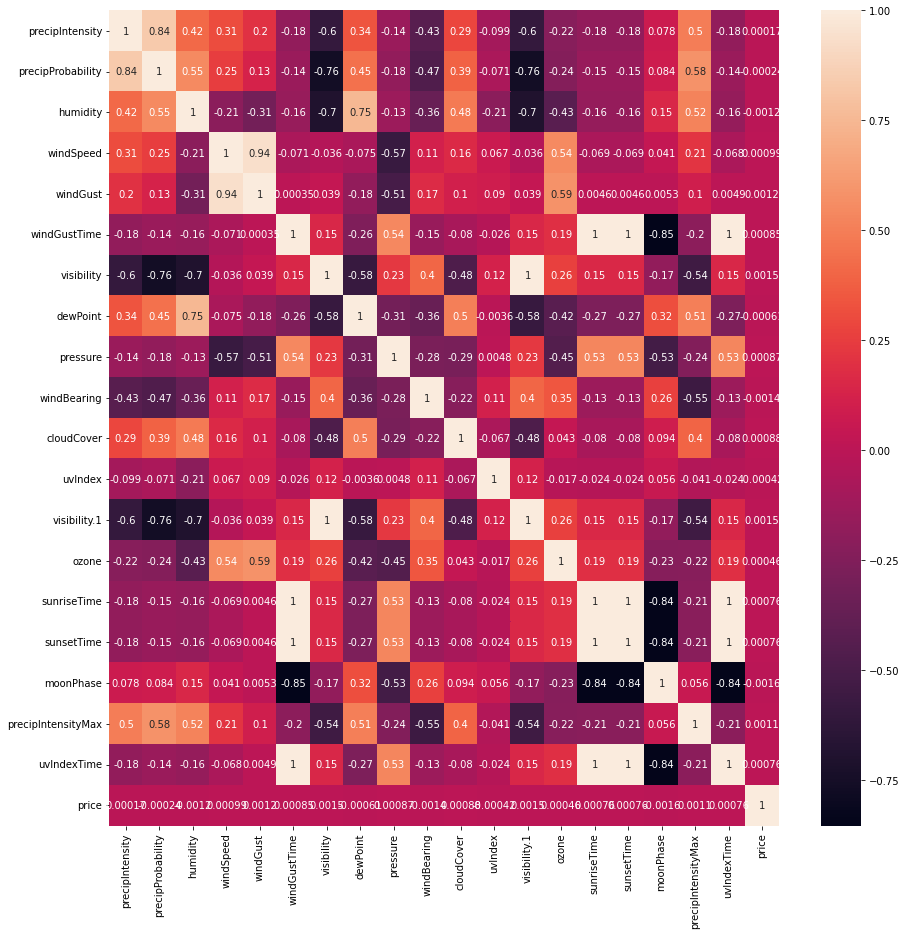

In [26]:
# Buat variabel weath berisi nama kolom2 cuaca
weather = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust','windGustTime','visibility','dewPoint','pressure','windBearing',
       'cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime',
       'moonPhase','precipIntensityMax','uvIndexTime','price']

# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df[weather].corr(), annot=True)

Terlihat jika cuaca hanya mempunyai pengaruh yang sangat kecil terhadap price, sehingga kolom2 tsb akan dihapus

In [27]:
# Drop kolom2 cuaca
df = df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust','windGustTime','visibility','dewPoint','pressure','windBearing',
       'cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime',
       'moonPhase','precipIntensityMax','uvIndexTime'], axis = 1)

In [28]:
# Tampilkan dataset setelah menghapus kolom waktu, temperatur dan cuaca
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,weather
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


Hanya tersisa sebanyak 7 fitur. Berikutnya kita ingin mengetahui korelasi antara kolom dengan value categorical terhadap price. Caranya adalah dengan mengubah data categorical tsb menggunakan label encoder

In [31]:
# Buat variabel label sebagai label encoder
labels = preprocessing.LabelEncoder()

In [32]:
#Pisahkan kolom2 categorical, tempatkan pada df_cat
df_cat = df[['source','destination','cab_type','name','weather']]

#Transform data categorical pada kolom2 tsb menggunakan looping
for col in df_cat.columns:
    df_cat[col] = labels.fit_transform(df_cat[col])

<ipython-input-32-4da75a410f10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = labels.fit_transform(df_cat[col])


In [33]:
# Tambahkan kolom price pada df_cat
df_cat['price'] = df['price']

# Tampilkan df_2_cat
df_cat.head()

<ipython-input-33-7e0b26498999>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['price'] = df['price']


,source,destination,cab_type,name,weather,price
0,5,7,0,7,4,5.0
1,5,7,0,2,8,11.0
2,5,7,0,5,0,7.0
3,5,7,0,4,0,26.0
4,5,7,0,6,6,9.0


Sekarang semua kolom categorical berisi angka. Berikutnya analisa korelasi dengan heatmap

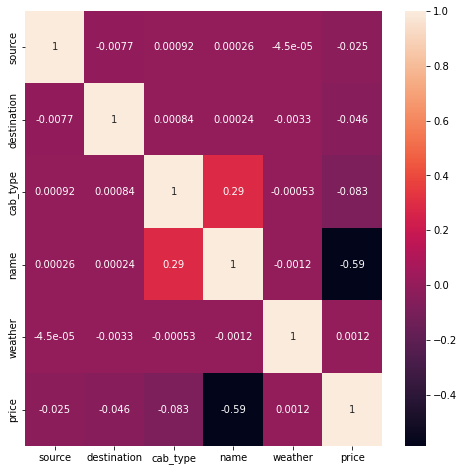

In [34]:
# Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_cat.corr(), annot=True)

Terlihat jika hanya variabel name saja yang memiliki korelasi cukup besar dengan price. Variabel lainnya hanya memiliki korelasi <0.1.

Oleh karena itu hanya kolom name saja yang dipertahankan, sisanya akan dihapus

In [35]:
# Hapus kolom weather, destination, source dan cab_type pada df
df = df.drop(['weather', 'destination', 'source', 'cab_type'], axis = 1)

# Tampilkan kolom df
df.head()

,name,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0


Sekarang kolom df hanya berisi 3 fitur saja

In [36]:
# Tampilkan value unik pada kolom name
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

Langkah selanjutnya adalah mengubah value dalam kolom name menjadi nilai binary menggunakan onehotencoder sebelum diproses menjadi training set dan testing set

In [37]:
# Buat variabel df_name yang hanya berisi kolom name
df_name = df[['name']]

In [38]:
# Tampilkan kolom name
df_name.head()

,name
0,Shared
1,Lux
2,Lyft
3,Lux Black XL
4,Lyft XL


Lakukan proses onehot encoding

In [40]:
# Buat model encoder pada enc
enc = OneHotEncoder(sparse=False)

# Transform df_name menjadi hasil encoder
df_name_enc = enc.fit_transform(df_name)

In [41]:
# Buat variabel df_name_encoded berisi value hasil encoder beserta kolom yang menggunakan nama2 sesuai dengan nama2 value categoricalnya
df_name_encoded = pd.DataFrame(df_name_enc, columns=enc.categories_)

In [42]:
# Reset index untuk persiapan join
df_1 = df.reset_index(drop=True)

In [43]:
# Reset index untuk persiapan join
df_name_encoded = df_name_encoded.reset_index(drop=True)

In [44]:
# Join df_1 dengan df_name_encoded
df_merged = pd.merge(df_1, df_name_encoded, left_index=True, right_index=True)
# Tampilkan hasilnya
df_merged.head()

,name,price,distance,surge_multiplier,"(Black,)","(Black SUV,)","(Lux,)","(Lux Black,)","(Lux Black XL,)","(Lyft,)","(Lyft XL,)","(Shared,)","(UberPool,)","(UberX,)","(UberXL,)","(WAV,)"
0,Shared,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Lux,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lyft,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lux Black XL,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lyft XL,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Hasil dari proses pd.merge diatas adalah sebuah join dataframe yang berisi nama kolom categorical dan value hasil encoding yang disatukan dengan dataset df_1. Namun, kolom name perlu dihapus karena sudah digantikan dengan hasil onehotencoder

In [45]:
# Drop kolom name
df_merged_1 = df_merged.drop(['name'],axis=1)
df_merged_1.head()

,price,distance,surge_multiplier,"(Black,)","(Black SUV,)","(Lux,)","(Lux Black,)","(Lux Black XL,)","(Lyft,)","(Lyft XL,)","(Shared,)","(UberPool,)","(UberX,)","(UberXL,)","(WAV,)"
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Dataset diatas sudah siap untuk menjalani proses pemodelan. Berikutnya pisahkan antara fitur dengan target

In [46]:
# Buat variabel fitur
X = df_merged_1.drop('price',axis=1)
# Buat variabel target
y = df_merged_1['price']

Lakukan proses train_test_split

In [49]:
# Lakukan train_test_split dengan testing set sebanyak 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# VI. MODEL DEFINITION

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model yang dipakai untuk proyek ini adalah linear regresi dan linear regresi dengan hyperparameter Lasso dan Ridge. Alasan menggunakan model2 tsb adalah untuk membandingkan performance antar model dan mencari model dengan performance terbaik

In [52]:
# Buat model linear regression
regression_model = LinearRegression()

In [53]:
# Buat model lasso regularization
lasso_model = Lasso()

In [54]:
# Buat model ridge regularization
ridge_model = Ridge(alpha=1000)

# VII. MODEL TRAINING

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Pertama, training model linear regresi pada training set fitur dan target.

In [56]:
# Training model linear regresi pada X_train dan y_train
regmod = regression_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
# Tamplikan koefisien model linear regresi
regmod.coef_

array([  2.79300849,  18.31917746,   4.23332062,  13.99677786,
         0.81064732,   6.0971101 ,  15.3546312 ,  -7.36811349,
        -1.66269524, -10.24589548,  -7.53840857,  -6.52496595,
        -0.62085469,  -6.53155368])

In [58]:
# Tampilkan intercept model linear regresi
regmod.intercept_

-8.146614958797329

Arti koefisien dan intercept model akan dijelaskan di bagian terakhir dari laporan ini

Berikutnya, prediksi training set dan testing set menggunakan model linear regresi

In [59]:
# Prediksi nilai training set
y_pred_train = regmod.predict(X_train)

# Prediksi nilai testing set
y_pred_test = regmod.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Selanjutnya akan dicoba pemodelan linear regresi menggunakan hyperparameter Lasso regularization (L1).

In [61]:
# Training model linear regresi dengan Lasso regularization pada training fitur dan target
lmod = lasso_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
# Tamplikan koefisien model L1
lmod.coef_

array([ 2.05482522,  0.        ,  0.        ,  2.70300563,  0.        ,
        0.        ,  3.85717021, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ])

In [63]:
# Tamplikan koefisien model L1
lmod.intercept_

11.503658038586423

Jika diamati, terdapat perbedaan koefisien dan intercept model L1 dengan linear regresi biasa

Berikutnya, prediksi training set dan testing set dengan model L1

In [64]:
# Prediksi nilai training set
y_pred_train_l = lmod.predict(X_train)

# Prediksi nilai testing set
y_pred_test_l = lmod.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Terakhir, akan dicoba pemodelan linear regresi menggunakan hyperparameter Ridge regularization (L2).

In [67]:
# Training model linear regresi dengan Ridge regularization pada training fitur dan target
ridmod = ridge_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [68]:
# Tamplikan koefisien model L2
ridmod.coef_

array([  2.79584806,  15.04334151,   4.08990926,  13.63692533,
         0.86105724,   6.02013464,  15.0577443 ,  -7.11998742,
        -1.55249052, -10.05038252,  -7.42104485,  -6.42912794,
        -0.65647481,  -6.43626271])

In [69]:
# Tamplikan koefisien model L2
ridmod.intercept_

-4.826501647532922

Juga terdapat perbedaan koefisien dan intercept model L2 dengan linear regresi biasa dan model L1

In [70]:
# Prediksi nilai training set
y_pred_train_r = ridmod.predict(X_train)

# Prediksi nilai testing set
y_pred_test_r = ridmod.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


# VIII. MODEL EVALUATION

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. 

Masing-masing model akan dianalisa menggunakan metrik MAE, MSE, RMSE dan R^2

In [72]:
# Buat dataframe berisi data hasil perhitungan MAE, MSE, RMSE dan R^2 untuk training set dan testing set pada masing2 model
model_eval = pd.DataFrame({'Linear Regression': [mean_absolute_error(y_train, y_pred_train),mean_absolute_error(y_test, y_pred_test),
mean_squared_error(y_train, y_pred_train),mean_squared_error(y_test, y_pred_test),np.sqrt(mean_squared_error(y_train, y_pred_train)),
np.sqrt(mean_squared_error(y_test, y_pred_test)),r2_score(y_train, y_pred_train),r2_score(y_test, y_pred_test)],
'Lasso Regularization (L1)': [mean_absolute_error(y_train, y_pred_train_l),mean_absolute_error(y_test, y_pred_test_l),
                             mean_squared_error(y_train, y_pred_train_l),mean_squared_error(y_test, y_pred_test_l),
                             np.sqrt(mean_squared_error(y_train, y_pred_train_l)),np.sqrt(mean_squared_error(y_test, y_pred_test_l)),
                             r2_score(y_train, y_pred_train_l),r2_score(y_test, y_pred_test_l)],
'Ridge Regularization (L2)': [mean_absolute_error(y_train, y_pred_train_r),mean_absolute_error(y_test, y_pred_test_r),
                             mean_squared_error(y_train, y_pred_train_r),mean_squared_error(y_test, y_pred_test_r),
                            np.sqrt(mean_squared_error(y_train, y_pred_train_r)),np.sqrt(mean_squared_error(y_test, y_pred_test_r)),
                             r2_score(y_train, y_pred_train_r),r2_score(y_test, y_pred_test_r)]},
	index=['MAE train','MAE test','MSE train','MSE test','RMSE train','RMSE test','R^2 train','R^2 test'])

# Tampilkan dataframe
model_eval


,Linear Regression,Lasso Regularization (L1),Ridge Regularization (L2)
MAE train,1.775399,6.547413,1.766567
MAE test,1.782145,6.565265,1.772950
MSE train,6.313170,62.619943,6.441772
MSE test,6.363585,63.082114,6.502525
RMSE train,2.512602,7.913276,2.538065
RMSE test,2.522615,7.942425,2.550005
R^2 train,0.927284,0.278737,0.925803
R^2 test,0.927222,0.278552,0.925633


Performance model akan diukur berdasarkan nilai R^2-nya. Secara keseluruhan, nilai R^2 pada training set dan testing set hampir sama. Model Linear Regression dan Ridge regularization memiliki nilai R^2 berdekatan (~0.92). Model Lasso regularization memiliki R^2 yang kecil, sehingga bisa dikategorikan sebagai model yang buruk. Dilihat dari nilai MAE, MSE dan RMSE pada model Lasso juga cenderung lebih tinggi dari model Linear Regression dan Ridge regularization pada parameter yang sama.

# IX. MODEL INFERENCE

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Model inference akan dilakukan terhadap dataset X sebagai dataset original

In [73]:
# Prediksi nilai y pada dataset original menggunakan model Linear Regression
y_pred_inf = regmod.predict(X)

# Prediksi nilai y pada dataset original menggunakan model Lasso regularization
y_pred_inf_l = lmod.predict(X)

# Prediksi nilai y pada dataset original menggunakan model Ridge regularization
y_pred_inf_r = ridmod.predict(X)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [74]:
# Buat dataframe berisi data hasil perhitungan MAE, MSE, RMSE dan R^2 untuk dataset original pada masing2 model
model_eval_inf = pd.DataFrame({'Linear Regression': [mean_absolute_error(y, y_pred_inf), mean_squared_error(y, y_pred_inf),
                                                     np.sqrt(mean_squared_error(y, y_pred_inf)),r2_score(y, y_pred_inf)],
'Lasso Regularization (L1)': [mean_absolute_error(y, y_pred_inf_l), mean_squared_error(y, y_pred_inf_l),
                                                     np.sqrt(mean_squared_error(y, y_pred_inf_l)),r2_score(y, y_pred_inf_l)],
'Ridge Regularization (L2)': [mean_absolute_error(y, y_pred_inf_r), mean_squared_error(y, y_pred_inf_r),
                                                     np.sqrt(mean_squared_error(y, y_pred_inf_r)),r2_score(y, y_pred_inf_r)]},
	index=['MAE','MSE','RMSE','R^2'])

model_eval_inf

,Linear Regression,Lasso Regularization (L1),Ridge Regularization (L2)
MAE,1.776749,6.550984,1.767843
MSE,6.323253,62.712377,6.453922
RMSE,2.514608,7.919115,2.540457
R^2,0.927272,0.278700,0.925769


Secara keseluruhan, nilai R^2 pada inference set (original dataset) dan training set serta testing set hampir sama. Dapat dikatakan ketiga model tsb cukup reliable jika diterapkan pada data real.

# X. KESIMPULAN

Analisa dataset rideshare_kaggle.csv untuk memprediksi harga perjalanan platform ride-hailing telah berhasil dilakukan dengan menggunakan model Linear Regression, Lasso Regularization dan Ridge Regularization. Setelah melalui seleksi fitur dengan hanya memakai fitur dengan korelasi cukup besar terhadap target, pemodelan dilakukan dengan 3 fitur: name, distance dan surge_multiplier. Target dari pemodelan adalah price.

Performance model diukur berdasarkan nilai R^2-nya. Secara keseluruhan, nilai R^2 pada training set dan testing set hampir sama. Model Linear Regression dan Ridge regularization memiliki nilai R^2 berdekatan (~0.92). Model Lasso regularization memiliki R^2 yang kecil, sehingga bisa dikategorikan sebagai model yang buruk. Dilihat dari nilai MAE, MSE dan RMSE pada model Lasso juga cenderung lebih tinggi dari model Linear Regression dan Ridge regularization pada parameter yang sama.

Dilihat dari pengujian terhadap model inference berupa original dataset, nilai R^2 pada inference set, hampir sama dengan training set dan testing set. Oleh karena itu, ketiga model tsb bisa dianggap cukup reliable jika diterapkan pada data real.

Rekomendasi dari penelitian ini adalah untuk menggunakan model multiple Linear Regression tanpa menambahkan hyperparameter Lasso atau Ridge, karena model Linear Regression saja sudah cukup baik untuk memprediksi harga perjalanan platform ride-hailing dengan R^2 score 0.92.

# Pertanyaan

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Asumsi pada Linear Regression adalah:

-Linearity, yaitu terdapat hubungan linear antara variabel independen (x) dan variabel dependen (y)

-Homoskedastis, yaitu variance dari residual sama pada setiap nilai x

-Masing-masing nilai x adalah independen satu sama lain dan masing-masing memiliki korelasi terhadap y

-Nilai residual terdistribusi secara normal

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

Persamaan Linear Regression hasil pemodelan:

Price = -8.14 + 2.8*distance + 18.3*surge_multiplier + 4.2*(Black) + 14*(Black SUV) + 0.81*(Lux) +6*(Lux Black) + 15.35*(Lux Black XL) -7.36*(Lyft) 
-1.66*(Lyft XL) -10.24*(Shared) -7.53*(UberPool) -6.52*(UberX) -0.62*(UberXL) -6.53*(WAV)

Angka positif pada koefisien menunjukkan hubungan berbanding lurus dengan price dan angka negatif menunjukkan hubungan berbanding terbalik. Semakin positif atau negatif nilai koefisien, semakin besar pengaruhnya terhadap harga. Jika dilihat pada model, surge_multiplier memiliki pengaruh terbesar terhadap harga. Pada kolom nama layanan, 'Lux Black XL' adalah layanan yang paling berpengaruh terhadap harga (tidak mengherankan karena layanan ini termasuk yang paling mahal secara rerata harga). 


In [ ]:
mod.coef_

array([  2.79300849,  18.31917746,   4.23332062,  13.99677786,
         0.81064732,   6.0971101 ,  15.3546312 ,  -7.36811349,
        -1.66269524, -10.24589548,  -7.53840857,  -6.52496595,
        -0.62085469,  -6.53155368])

In [ ]:
mod.intercept_

-8.146614958797329

In [ ]:
X.head()

,distance,surge_multiplier,"(Black,)","(Black SUV,)","(Lux,)","(Lux Black,)","(Lux Black XL,)","(Lyft,)","(Lyft XL,)","(Shared,)","(UberPool,)","(UberX,)","(UberXL,)","(WAV,)"
0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
